<script>
    var code_show=true; //true -> hide code at first

    function code_toggle() {
        $('div.prompt').hide(); // always hide prompt

        if (code_show){
            $('div.input').hide();
        } else {
            $('div.input').show();
        }
        code_show = !code_show
    }
    $( document ).ready(code_toggle);
</script>

<center>
<h1>Sardinian Summer School 2018: From GWAS to function</h1><br><br>
<h2>Workshop 2: Hands-on tutorial for GWAS</h2><br><br>
<h2>Part I : QC</h2><br><br>

Arthur Gilly(ag15@sanger.ac.uk), workshop by Kostas Hatzikotoulas</i>
</center>
<br><br>
<center>
<div style="width:70%;border: 2px solid red;">
If you run into trouble locating the datasets for the workshop, you can find them <a href="https://drive.google.com/file/d/1jQnwuBnILqBWpzVmzQs6O59FRY-kfpKv/view?usp=sharing">at the following address</a>.
<br>
As this will download the files on your computer, you may want to use the command line instead to download the files on the server:<br>
```
 wget --load-cookies cookies.txt -O data.tar.gz --no-check-certificate https://drive.google.com$(wget --save-cookies cookies.txt --keep-session-cookies -q -O- --no-check-certificate 'https://drive.google.com/uc?export=download&id=1jQnwuBnILqBWpzVmzQs6O59FRY-kfpKv' | fgrep 'uc-download-link'|sed 's/.*uc-download-link//;s/.>.*//;s/.*href..//;s/\&amp\;/\&/g')
```
</div>
</center>

## ToC

1. QC of GWAS data
    1. Sample-level QC
    2. Site-level QC
2. Performing a GWAS

## QC of GWAS data

In this workshop, we will cover the data quality assessment and control steps that are typically carried out during genome wide association studies (GWAS).

## Why do we need the QC?

Study design and errors in genotype calling can introduce systematic biases into GWAS, leading to spurious associations.

A thorough QC can help us identify samples and markers that should be removed prior to association analysis in order to minimize the number of false-positive and false-negative associations. 

<img src="FN.png" width="40%">

In this tutorial, we assume that the study design has been conducted appropriately and the QC applies to genotypes after they have been called from probe intensity data.


The QC protocol of a GWAS is usually split into two broad categories, “Sample QC” and “Variant QC”. In the first step we examine all markers for every sample, in order to remove "bad" ones, which may inflate the p-value distribution (cause false positives), or make us lose power, or otherwise lead to a violation of the hypotheses of the statistical model. The second step aims to remove variants which are incorrectly called, and might therefore lead to false positives.

In general, sample QC is done prior to Variant QC because we want to maximise the number of markers remaining in the study.


## Sample-level QC

This first phase consists of (at least) five steps:

<img src="QCsteps.png" width="40%">

Fortunately, all these steps can be performed using one piece of software, called Plink. Plink 1.9 should have been installed in your environment. You can check this by opening a terminal and typing `plink`.

First, locate the workshop files: `Sardinia2018.{bed|bim|fam}`

These files are in Plink binary format, which you can read about [here](https://www.cog-genomics.org/plink/1.9/formats#bed). You can open the `fam` and `bim` files with e.g. `less`, but don't try to open the `bed` one, it is a binary file.


### Step 1: Individuals with outlying missing genotype

In this first step, we want to flag samples that have abnormally low call rate, in other words that have too many missing genotypes, which is indicative of overall bad sample quality. For this, we use the `--missing` and `--mind` aguments of Plink. You can look them up in the [index](https://www.cog-genomics.org/plink/1.9/index).


##### Run missingness across file genome-wide


<div class="alert alert-info">
<b>Question 1</b>: Run a missingness check on our file genome-wide using <code>--missing</code>. Plot the resulting missingness per sample in R, and extract the samples with more than 2% missingness. Filter out samples with more than 2% missingness using <code>--mind</code>, and check that they correspond to the ones you marked in R.
</div>



```bash
# Create missingness report
plink --bfile Sardinia2018 --missing --out Sardinia2018
# Filter out bad samples
plink --bfile Sardinia2018 --mind 0.02 --make-bed --out Sardinia2018.nomissingsamples
```

In R we will be using the package <code>data.table</code>, which provides a lot of useful commands, such as <code>fread</code> for fast reading in of large files. If you want to find out more about <code>data.table</code> and its perks, you can do so [here](https://cran.r-project.org/web/packages/data.table/vignettes/datatable-intro.html) and [here](https://cran.r-project.org/web/packages/data.table/data.table.pdf).

             FID          IID MISS_PHENO N_MISS N_GENO  F_MISS
 1:  BadSample_7  BadSample_7          Y  15033 426901 0.03521
 2:  BadSample_8  BadSample_8          Y  14224 426901 0.03332
 3:  BadSample_9  BadSample_9          Y  30159 426901 0.07065
 4: BadSample_10 BadSample_10          Y   9490 426901 0.02223
 5:  BadSample_1  BadSample_1          Y 234164 426901 0.54850
 6:  BadSample_2  BadSample_2          Y 105637 426901 0.24750
 7:  BadSample_3  BadSample_3          Y 212529 426901 0.49780
 8:  BadSample_4  BadSample_4          Y  94534 426901 0.22140
 9:  BadSample_5  BadSample_5          Y 234100 426901 0.54840
10: BadSample_11 BadSample_11          Y  35366 426901 0.08284
11: BadSample_12 BadSample_12          Y  61014 426901 0.14290
12: BadSample_13 BadSample_13          Y  83426 426901 0.19540
13: BadSample_14 BadSample_14          Y  44037 426901 0.10320
14: BadSample_15 BadSample_15          Y  70939 426901 0.16620


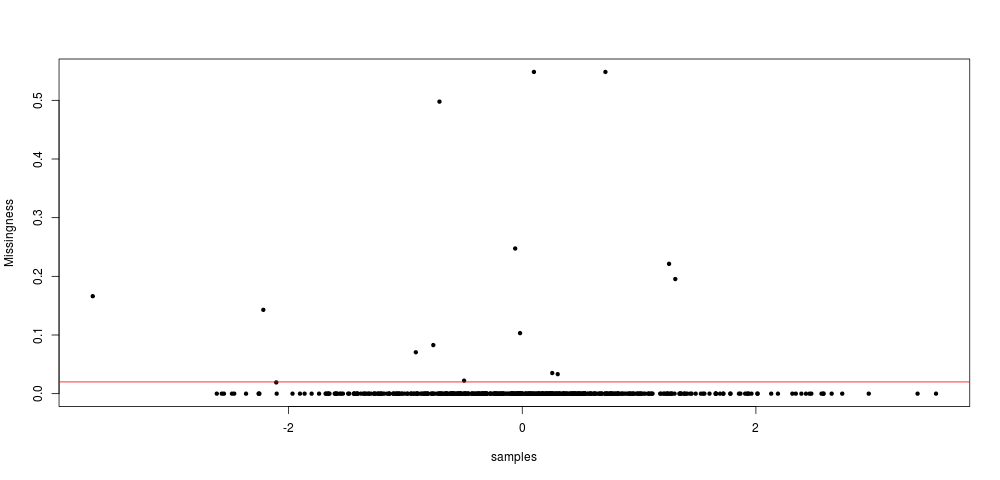

In [7]:
%%R -w 1000
setwd("/nfs/team144/Sardinia2018/test") ## YOU DON'T NEED THIS LINE
d=fread("Sardinia2018.imiss")
library(data.table) # makes reading files easier
plot(rnorm(nrow(d)), d$F_MISS, pch=20, xlab="samples", ylab="Missingness")
abline(h=0.02, col=2)
d[d$F_MISS>=0.02,]

This means we exclude 14 samples from the dataset based on missingness. Comparing with Plink `--mind`:

In [10]:
%%bash
cd /nfs/team144/Sardinia2018/test
comm -3 <(cut -f1 Sardinia2018.fam| sort) <(cut -f1 Sardinia2018.nomissingsamples.fam | sort)
echo
echo Number of excluded samples:
comm -3 <(cut -f1 Sardinia2018.fam| sort) <(cut -f1 Sardinia2018.nomissingsamples.fam | sort) | wc -l

BadSample_10 BadSample_10 0 0 2 -9
BadSample_11 BadSample_11 0 0 1 -9
BadSample_12 BadSample_12 0 0 2 -9
BadSample_13 BadSample_13 0 0 2 -9
BadSample_14 BadSample_14 0 0 2 -9
BadSample_15 BadSample_15 0 0 2 -9
BadSample_1 BadSample_1 0 0 2 -9
BadSample_2 BadSample_2 0 0 2 -9
BadSample_3 BadSample_3 0 0 2 -9
BadSample_4 BadSample_4 0 0 1 -9
BadSample_5 BadSample_5 0 0 2 -9
BadSample_7 BadSample_7 0 0 1 -9
BadSample_8 BadSample_8 0 0 2 -9
BadSample_9 BadSample_9 0 0 2 -9

Number of excluded samples:
14


We confirm that we have the same number of samples.


### Step 2: Individuals with discordant sex information

We can impute sexes from chrX genotypes (only females are supposed to have heterozygosity), and compare it with our sample info. Sex information is stored in the 5th column of the `.fam` file.

<div class="alert alert-info">
<b>Question 2</b>: Run a sex check with the <code>--check-sex</code> flag. Plot the resulting statistics and identify problematic samples (you can use plotting symbols and colours to represent imputed and phenotype sexes). Remove the problematic samples using Plink.

NB: Normally you would need to remove the pseudoautosomal regions of chrX with something like <code>plink --bfile Sardinia2018.nomissingsamples --split-x hg19</code>, but we did this already for you.
</div>

```bash
plink --bfile Sardinia2018.nomissingsamples --check-sex --out Sardinia2018.nomissingsamples.checksex
```


       FID     IID PEDSEX SNPSEX  STATUS      F
1: HG00154 HG00154      2      0 PROBLEM 0.2739
2: HG00361 HG00361      2      1 PROBLEM 0.9084
3: NA20506 NA20506      2      1 PROBLEM 0.9755
4: NA20530 NA20530      2      1 PROBLEM 0.9672
5: NA20533 NA20533      2      1 PROBLEM 0.8413


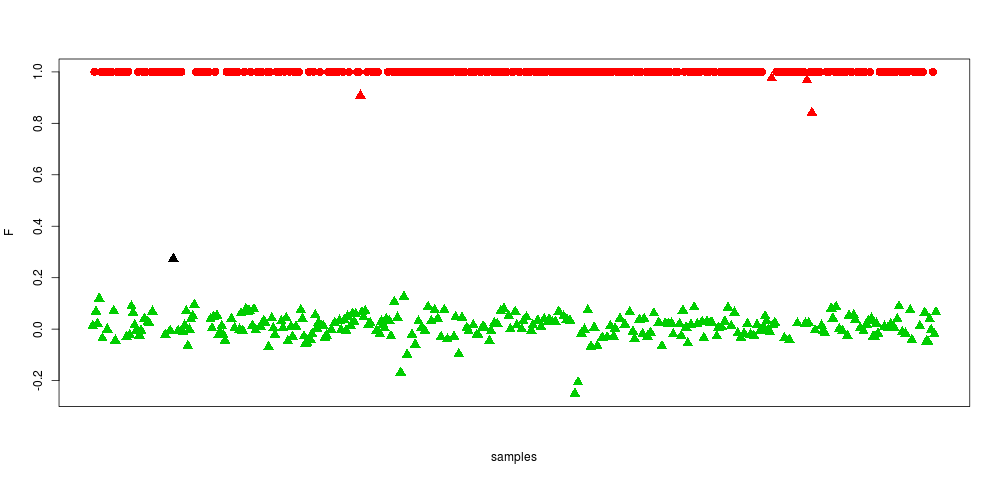

In [25]:
%%R -w 1000
d=fread("Sardinia2018.nomissingsamples.checksex.sexcheck")

plot(d$F, pch=d$PEDSEX+15, col=d$SNPSEX+1, cex=1.5, xlab="samples", xaxt="n", ylab="F")
d[d$STATUS=="PROBLEM",]

We find 5 samples with conflicting sex information: one female with high F, and 4 genetic males which are female in the phenotype file. We exclude these samples from the analysis:

```bash
plink --bfile Sardinia2018.nomissingsamples --remove <(fgrep -e FID -e PROBLEM Sardinia2018.nomissingsamples.checksex.sexcheck| awk '{print $1, $2}') --make-bed --out Sardinia2018.nomissingsamples.nosexproblems
```

### Step 3: Individuals with outlying heterozygosity rate


We want to remove sample with excess heterozygosity. If a sample contains many more heterozygotes than the norm, it is a sign of overall noisiness of the signal. Low heterozygosity can be a sign of inbreeding. 

<div class="alert alert-info">
<b>Question 3 </b>: Compute heterozygosity using <code>--het</code>. Do we have any more samples to remove?
</div>

```bash
plink --bfile Sardinia2018.nomissingsamples.nosexproblems --het --out Sardinia2018.nomissingsamples.nosexproblems
# we can also compute it with the whole-sample file, to compare
plink --bfile Sardinia2018 --het --out Sardinia2018
```

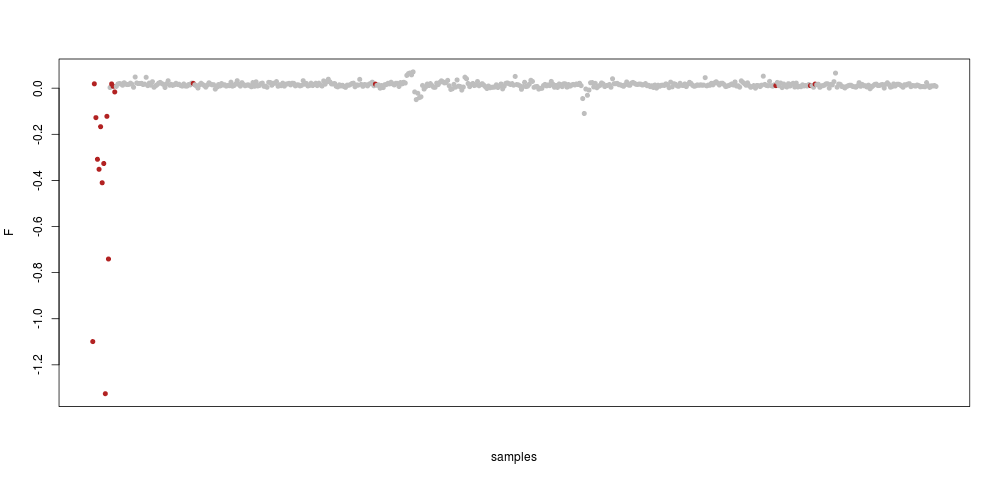

In [13]:
%%R -w 1000
d=fread("Sardinia2018.nomissingsamples.nosexproblems.het", select=c("FID", "F"))
e=fread("Sardinia2018.het",select=c("FID", "F"))
d=merge(e, d, all.x=T, by="FID")
d$col="gray"
d$col[is.na(d$F.y)]="firebrick"
plot(d$F.x, col=d$col, pch=20, cex=1.2, xlab="samples", xaxt="n", ylab="F")

We have already excluded het rate outliers.




### Step 4: Duplicated or related individuals

We measure relatedness between individuals, and are looking for abnormally high values which might indicate sample duplicates or contamination. Note that this measure is strongly correlated with the average inbreeding in the population, so if your population is specific in that sense (e.g. a population isolate), you should be careful with imposing arbitrary thresholds from cosmopolitan populations.


<div class="alert alert-info">
<b>Question 4 </b>: Plink advises to filter out rare variants (<code>MAF lower than 1%</code>) and perform LD pruning (<code>--indep 50 5 2</code>). Perform these steps and then create a kinship report with <code>--genome</code>. How many samples would you exclude? Would you have gotten the same without filtering?
</div>

```bash
plink --bfile Sardinia2018.nomissingsamples.nosexproblems --maf 0.01 --make-bed --out Sardinia2018.nomissingsamples.nosexproblems.norare

plink --bfile Sardinia2018.nomissingsamples.nosexproblems.norare --indep 50 5 1.25 --out Sardinia2018.nomissingsamples.nosexproblems.norare

plink --bfile Sardinia2018.nomissingsamples.nosexproblems.norare --extract Sardinia2018.nomissingsamples.nosexproblems.norare.prune.in --out Sardinia2018.nomissingsamples.nosexproblems.norare.ldpruned --make-bed

plink --bfile Sardinia2018.nomissingsamples.nosexproblems.norare.ldpruned --genome --out Sardinia2018.nomissingsamples.nosexproblems.norare.ldpruned

# we can compare to without any variant filtering or pruning
plink --bfile Sardinia2018.nomissingsamples.nosexproblems --genome --out Sardinia2018.nomissingsamples.nosexproblems
```


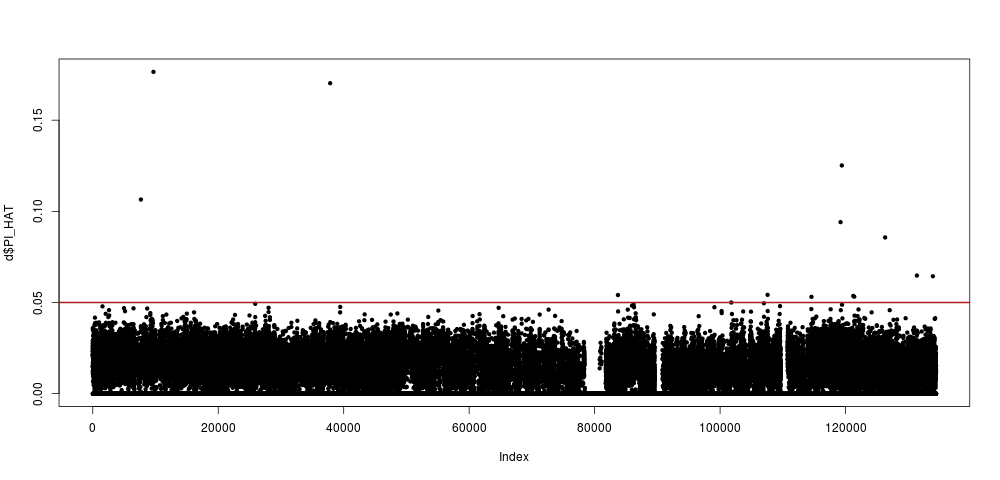

In [20]:
%%R -w 1000
d=fread("Sardinia2018.nomissingsamples.nosexproblems.norare.ldpruned.genome")
plot(d$PI_HAT, pch=20)
abline(h=0.05, lwd=2, col="firebrick")


In [ ]:
%%R
e=fread("Sardinia2018.nomissingsamples.nosexproblems.genome")
m=merge(d, e, by=c("FID1", "FID2"))

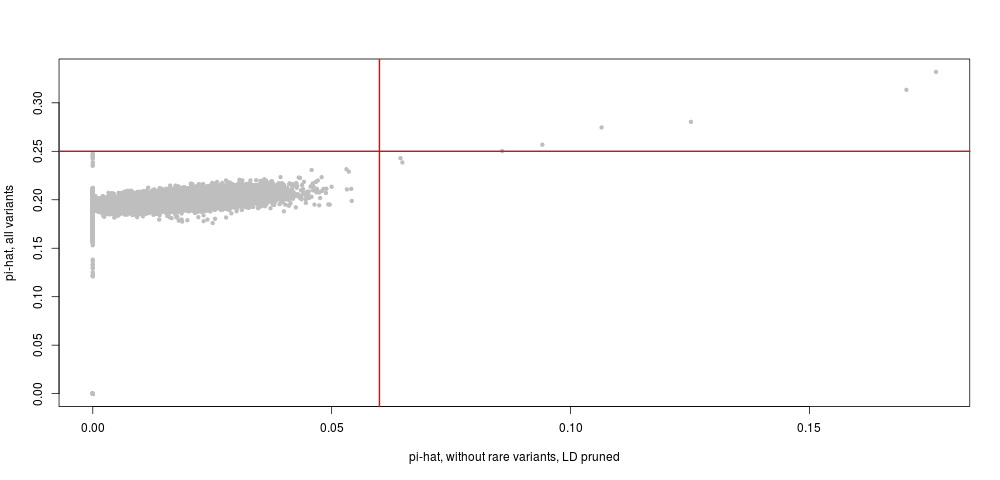

In [34]:
%%R -w 1000
plot(m$PI_HAT.x, m$PI_HAT.y, xlab="pi-hat, without rare variants, LD pruned", ylab="pi-hat, all variants", pch=20, col="gray")
abline(v=0.06, col="firebrick", lwd=2)
abline(h=0.25, col="firebrick", lwd=2)


We have 8 sample pairs that look like they are outliers. Looking at the following table, they are in the 10-15% range of kinship, which corresponds to first cousins and less related. Whether we exclude them depends on the study, but in most cases you will want to keep pi-hat at a maximum of around 5%. If you include more related samples you will have to correct for relatedness in your study.

![](http://upload.wikimedia.org/wikipedia/commons/d/d7/CousinTree_kinship.svg)

We further observe that filtering variants does change the scale of the pi-hat value, and overestimates kinship for some sample pairs.

In [35]:
%%R
highpairs=d[m$PI_HAT.x>0.06,]
print(highpairs)
table(c(highpairs$FID1, highpairs$FID2))

      FID1    IID1    FID2    IID2 RT EZ     Z0     Z1     Z2 PI_HAT PHE
1: HG00112 HG00112 HG00123 HG00123 UN NA 0.8227 0.1416 0.0357 0.1065  -1
2: HG00116 HG00116 HG00120 HG00120 UN NA 0.6805 0.2860 0.0335 0.1765  -1
3: HG00238 HG00238 HG00240 HG00240 UN NA 0.6940 0.2713 0.0347 0.1703  -1
4: NA11931 NA11931 NA11933 NA11933 UN NA 0.8206 0.1708 0.0087 0.0941  -1
5: NA11932 NA11932 NA12383 NA12383 UN NA 0.7615 0.2266 0.0120 0.1252  -1
6: NA12760 NA12760 NA12830 NA12830 UN NA 0.8529 0.1229 0.0243 0.0857  -1
7: NA20531 NA20531 NA20770 NA20770 UN NA 0.8810 0.1085 0.0105 0.0648  -1
8: NA20786 NA20786 NA20811 NA20811 UN NA 0.8850 0.1013 0.0137 0.0644  -1
        DST PPC  RATIO
1: 0.807950   1 2.5862
2: 0.819523   1 3.5599
3: 0.818548   1 3.1595
4: 0.804670   1 2.7717
5: 0.810014   1 2.8881
6: 0.803966   1 2.6487
7: 0.799865   1 2.4373
8: 0.799943   1 2.4064

HG00112 HG00116 HG00120 HG00123 HG00238 HG00240 NA11931 NA11932 NA11933 NA12383 
      1       1       1       1       1       1       

We check that each sample in the pair appears only once. If this was not the case we would exclude in priority the ones that are related to the most people so as to maximise the number of remaining samples.
As we are dealing with a small study, we choose to keep the samples in for now.

### Step 5: Ethnicity outliers

Finally, we check for ethnicity outliers. Here again, it is important to know a bit about the study. If we are studying diverse Europeans, we would not exclude an Italian sample, for example, whereas if our study was focused on Greeks, that sample would be treated as an outlier.

For this, we want to position our samples on a "genetic map" which will delineate ethnic gradients, the same way a geographical map indicates country boundaries. For this, we use a well-defined set of samples which contains individuals from all over the world, the 1000 genomes data. We are summarising their genetic similarity with each other and our samples and projecting it on two dimensions. This is done by a method called PCA or MDS.

<div class="alert alert-success">**Note:** PCA (principal component analysis) and MDS (multidimensional scaling) are used interchangeably by geneticists, often because they are not sure what the difference is. Mathematically, PCA is a particular case of MDS, and in the most common setting (Euclidean distance), they produce the same result.
</div>


<div class="alert alert-info">
<b>Question 5 </b>: For this step, you will need to merge your genotypes with 1000 Genomes genotype data. Merge the common-variant LD pruned file you have obtained at the previous step with the <code>1000Genomes</code> fileset. Use a <code>--geno 0.02</code> threshold to exclude variants unique to the 1000 Genomes dataset. Compute IBD with <code>--genome</code>. Compute MDS with <code>--mds</code>. 
</div>

<div class="alert alert-info">
<b>Question 6</b>: Plot the first two components of the MDS in R. You will need to differentiate your samples from the ones in the 1000 Genomes dataset, and also represent ethnicity (you can use symbols or colors). You will find information about sample ethnicity within the 1000 Genomes dataset in the <code>Populationfile-1kg.txt</code>.
</div>

```bash
plink --bfile Sardinia2018.nomissingsamples.nosexproblems.norare.ldpruned --bmerge ../1000Genomes --geno 0.02 --make-bed --out Sardinia2018.with1kg

plink --bfile Sardinia2018.with1kg --genome --out Sardinia2018.with1kg

plink --bfile Sardinia2018.with1kg --read-genome Sardinia2018.with1kg.genome --cluster --mds-plot 10 --out Sardinia2018.with1kg
```


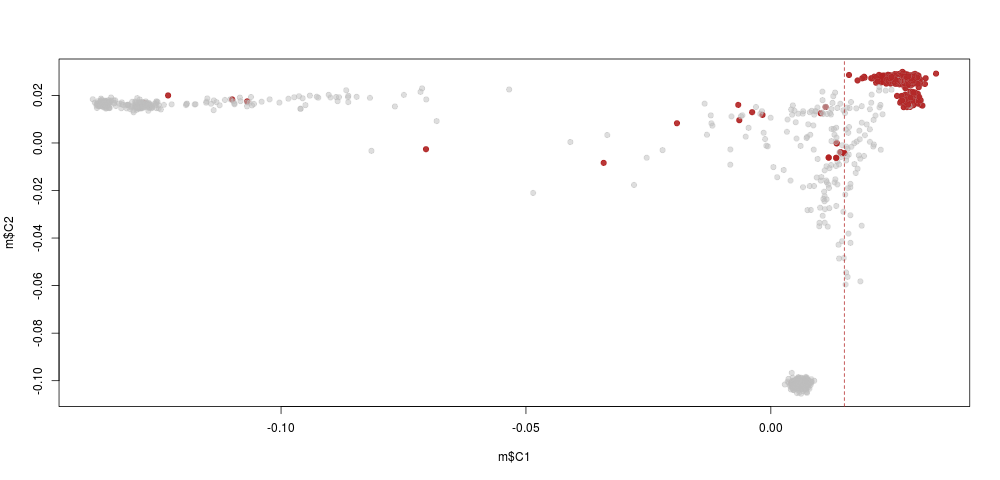

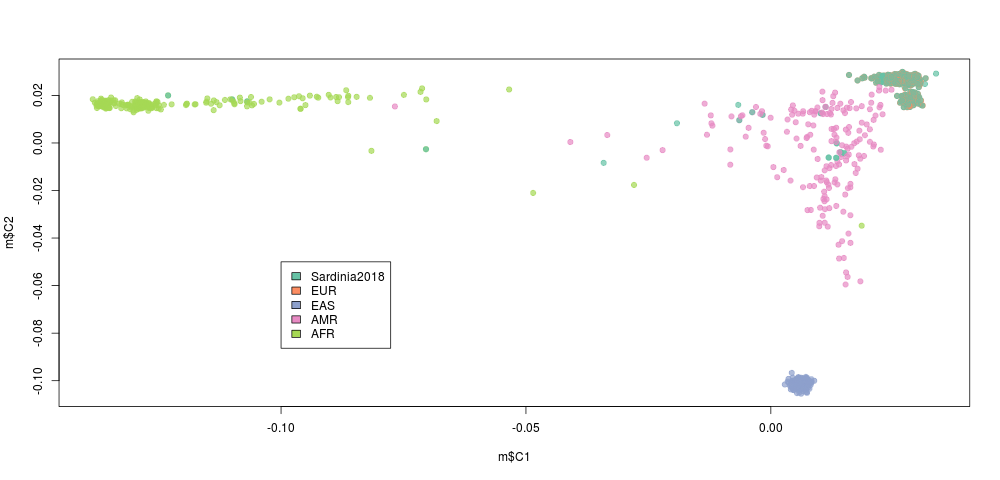

In [58]:
%%R -w 1000
d=fread("Sardinia2018.with1kg.mds")
e=fread("Populationfile-1kg.txt")
m=merge(d, e, by.x="FID", by.y="ID", all.x=T)
m$Superpopulation[is.na(m$Superpopulation)]="Sardinia2018"
library(RColorBrewer)
colors=cbind(unique(m$Superpopulation), brewer.pal(length(unique(m$Superpopulation)), "Set2"))
m$color=adjustcolor("gray", alpha=0.5)
m$color[m$Superpopulation=="Sardinia2018"]=adjustcolor("firebrick", alpha=0.9)
m$color2=adjustcolor(colors[match(m$Superpopulation, colors[,1]), 2], alpha=0.7)
plot(m$C1, m$C2, pch=20, cex=1.5, col=m$color)
abline(v=0.015, lty=2, col="firebrick")

plot(m$C1, m$C2, pch=20, cex=1.5, col=m$color2)
legend(-0.1, -0.05, colors[,1], fill=colors[,2])


These plots show us that 17 of our samples cluster away from the main European cluster, with some of them clearly belonging to the African cluster. If we did not expect this given our study design, we can exclude them using a simple 0.015 threshold on the first principal component.<br><br>

<div class="alert alert-success"><b>Note:</b> We computed principal components in the combined dataset: our samples plus world populations. If we wanted to keep non-European samples, we could also have computed PCs in our sample only, and include the components as covariates in our analysis to account for this population structure.
</div>

#### Combine all outliers' files and exclude them from your data

```
plink --bfile $DIR/VSS --remove /data/Workshop2_QC/Step6/Final_exclusionlist.txt --make-bed --out $DIR/VSS_sampleQCed

```

## Variant-level QC

This is in general much simpler to do than sample QC, as there is not as much deciding to do: mostly we just apply pre-defined thresholds.
It consists of (at least) four steps:

    1.Identification of variants with an excessive missing genotype
    2.Identification of variants demonstrating a significant deviation from Hardy-Weinberg equilibrium (HWE)
    3.Removal of all makers with a very low minor allele frequency

The criteria used to filter out low quality markers differ from study to study: for example, a MAF of 1% does not represent the same number of alleles in a study of 100 and 100,000 individuals. Variant QC must be done with great care as every removed marker is potentially a missed disease variant. After QC, imputation can be used to recover some of the excluded markers.

Here we are using the following thresholds:

* Call rate 98%
* Hardy-Weinberg Equilibrium $p \le 1\times10^{-4}$
* MAF 1%

<div class="alert alert-info">
<b>Question 7:</b> You already know how to apply call rate and MAF. Find the Hardy-Weinberg filtering option and apply the selected filters. How many variants remain in your dataset?
</div>

<br><br>
<h2>
<center>
Have you reached this point? Congratulations!<br>
Feel free to <a href="http://nbviewer.jupyter.org/github/agilly/SardiniaWorkshop/blob/master/Sardinia2018-association.ipynb">move on</a> to the association part.
</center>
</h2>